In [26]:
%matplotlib inline

import json
import numpy as np
import pandas as pd
import matplotlib as plt

path = 'usagov_bitly.txt'
records = [json.loads(line) for line in open(path)]
df = pd.DataFrame(records)

In [ ]:
clean_tz = df['tz'].fillna('Missing')
clean_tz[clean_tz == ''] = 'Unknown'

tz_counts = clean_tz.value_counts()

tz_counts[:10].plot(kind='barh', rot=0)

In [ ]:
agents = pd.Series([x.split()[0] for x in df.a.dropna()])
agents.value_counts()

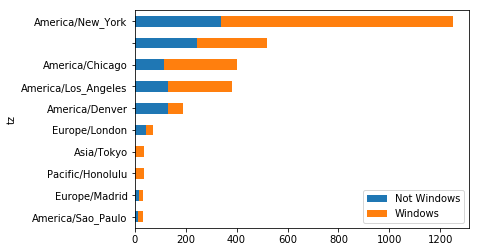

In [55]:
cdf = df[df['a'].notnull()]
os = np.where(cdf['a'].str.contains('Windows'), 'Windows', 'Not Windows')

by_tz_os = cdf.groupby(['tz', os])
agg_counts = by_tz_os.size().unstack().fillna(0)

indexer = agg_counts.sum(1).argsort()
count_subset = agg_counts.take(indexer)[-10:]

count_subset.plot(kind='barh', stacked=True)